In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
full_train_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/train.csv",na_values='?')
full_val_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/val.csv",na_values='?')
full_test_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/test.csv",na_values='?')

In [3]:
filtered_train_data = full_train_data.dropna(axis = 0)
filtered_val_data = full_val_data.dropna(axis = 0)
filtered_test_data = full_test_data.dropna(axis = 0)

In [4]:
x_train_data = filtered_train_data[["Age","Shape","Margin","Density"]].copy().to_numpy()
y_train_data = filtered_train_data[["Severity"]].copy().to_numpy().reshape((-1,))
x_val_data = filtered_val_data[["Age","Shape","Margin","Density"]].copy().to_numpy()
y_val_data = filtered_val_data[["Severity"]].copy().to_numpy().reshape((-1,))
x_test_data = filtered_test_data[["Age","Shape","Margin","Density"]].copy().to_numpy()
y_test_data = filtered_test_data[["Severity"]].copy().to_numpy().reshape((-1,))



In [173]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train_data, y_train_data)

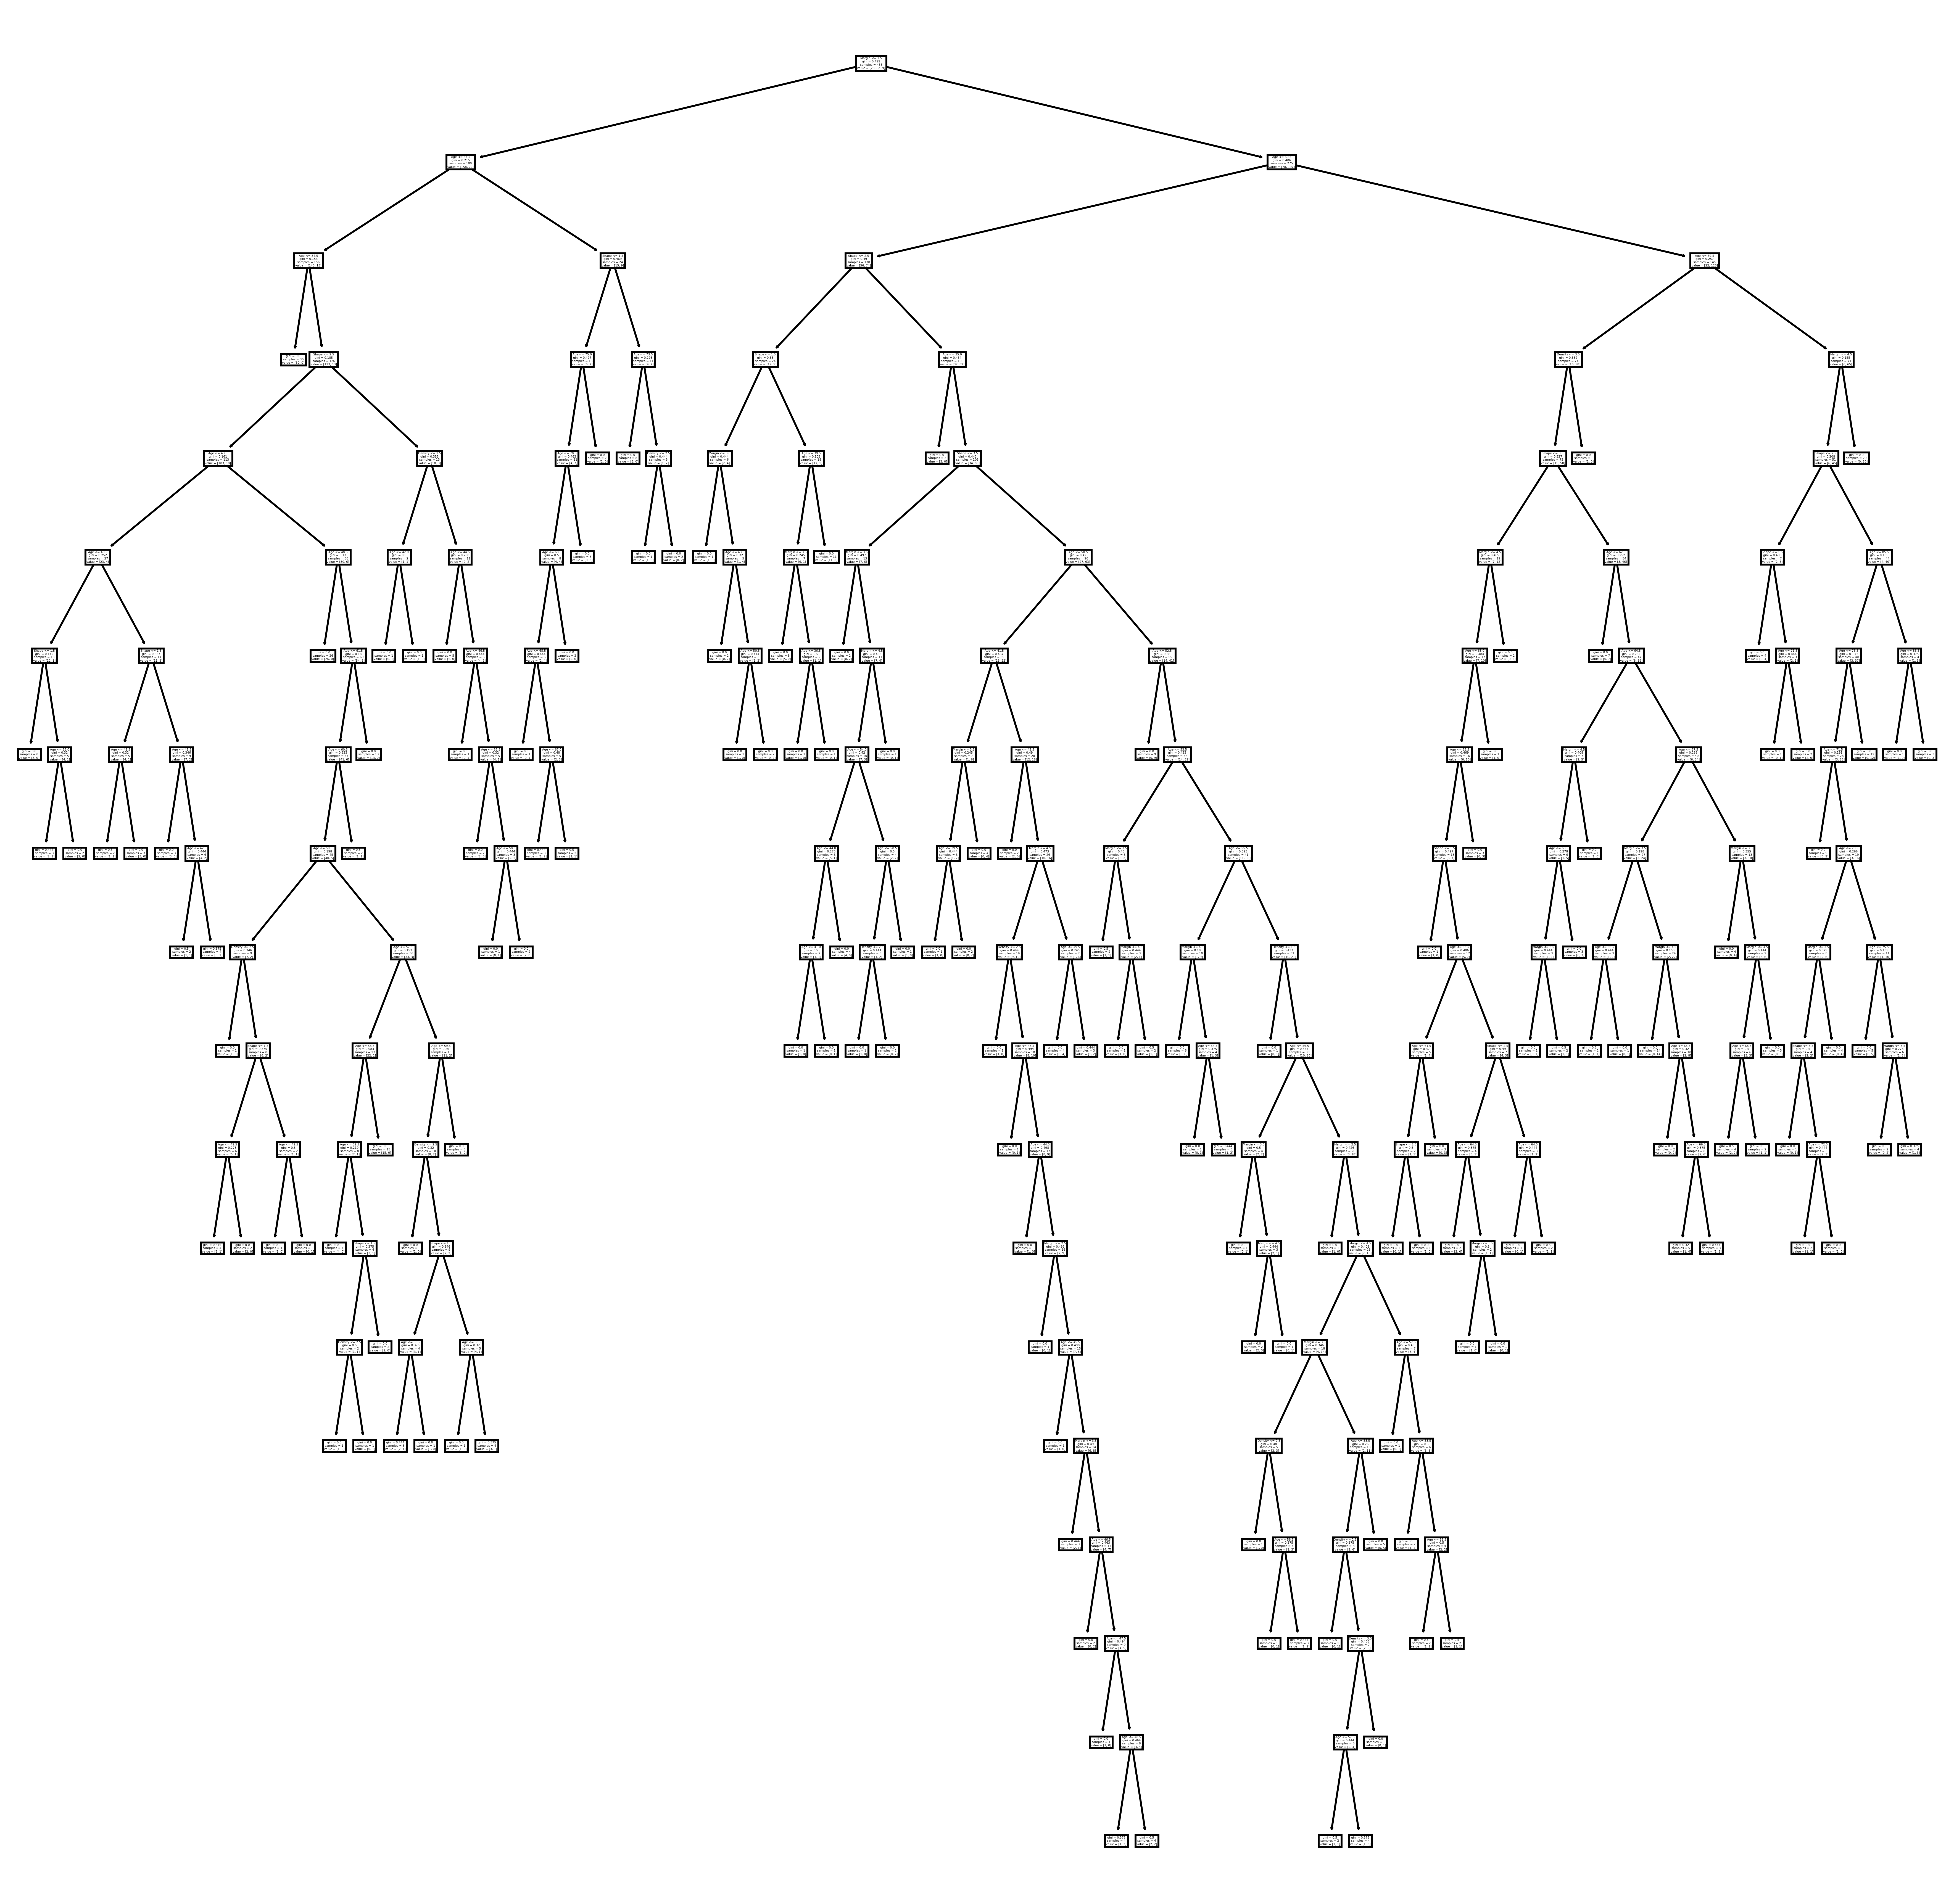

In [174]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize']=[18,18]    
    
fig,ax = plt.subplots()
tree.plot_tree(clf, feature_names=["Age","Shape","Margin","Density"],ax = ax)
plt.savefig("dtree.png")

In [175]:
print(clf.score(x_train_data,y_train_data))
print(clf.score(x_val_data,y_val_data))
print(clf.score(x_test_data,y_test_data))

0.9252747252747253
0.7603305785123967
0.691699604743083


In [176]:
best_set = []
best_acc = 0
for max_depth in range(2,20):
    for min_samples_split in range(2,20):
        for min_samples_leaf in range(1,20):
            clf = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
            clf = clf.fit(x_train_data, y_train_data)
            curr_acc = clf.score(x_val_data,y_val_data)
            if best_acc < curr_acc:
                best_set = [max_depth,min_samples_split,min_samples_leaf]
                best_acc = curr_acc
                
            

In [177]:
max_depth,min_samples_split,min_samples_leaf = best_set
clf = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train_data, y_train_data)

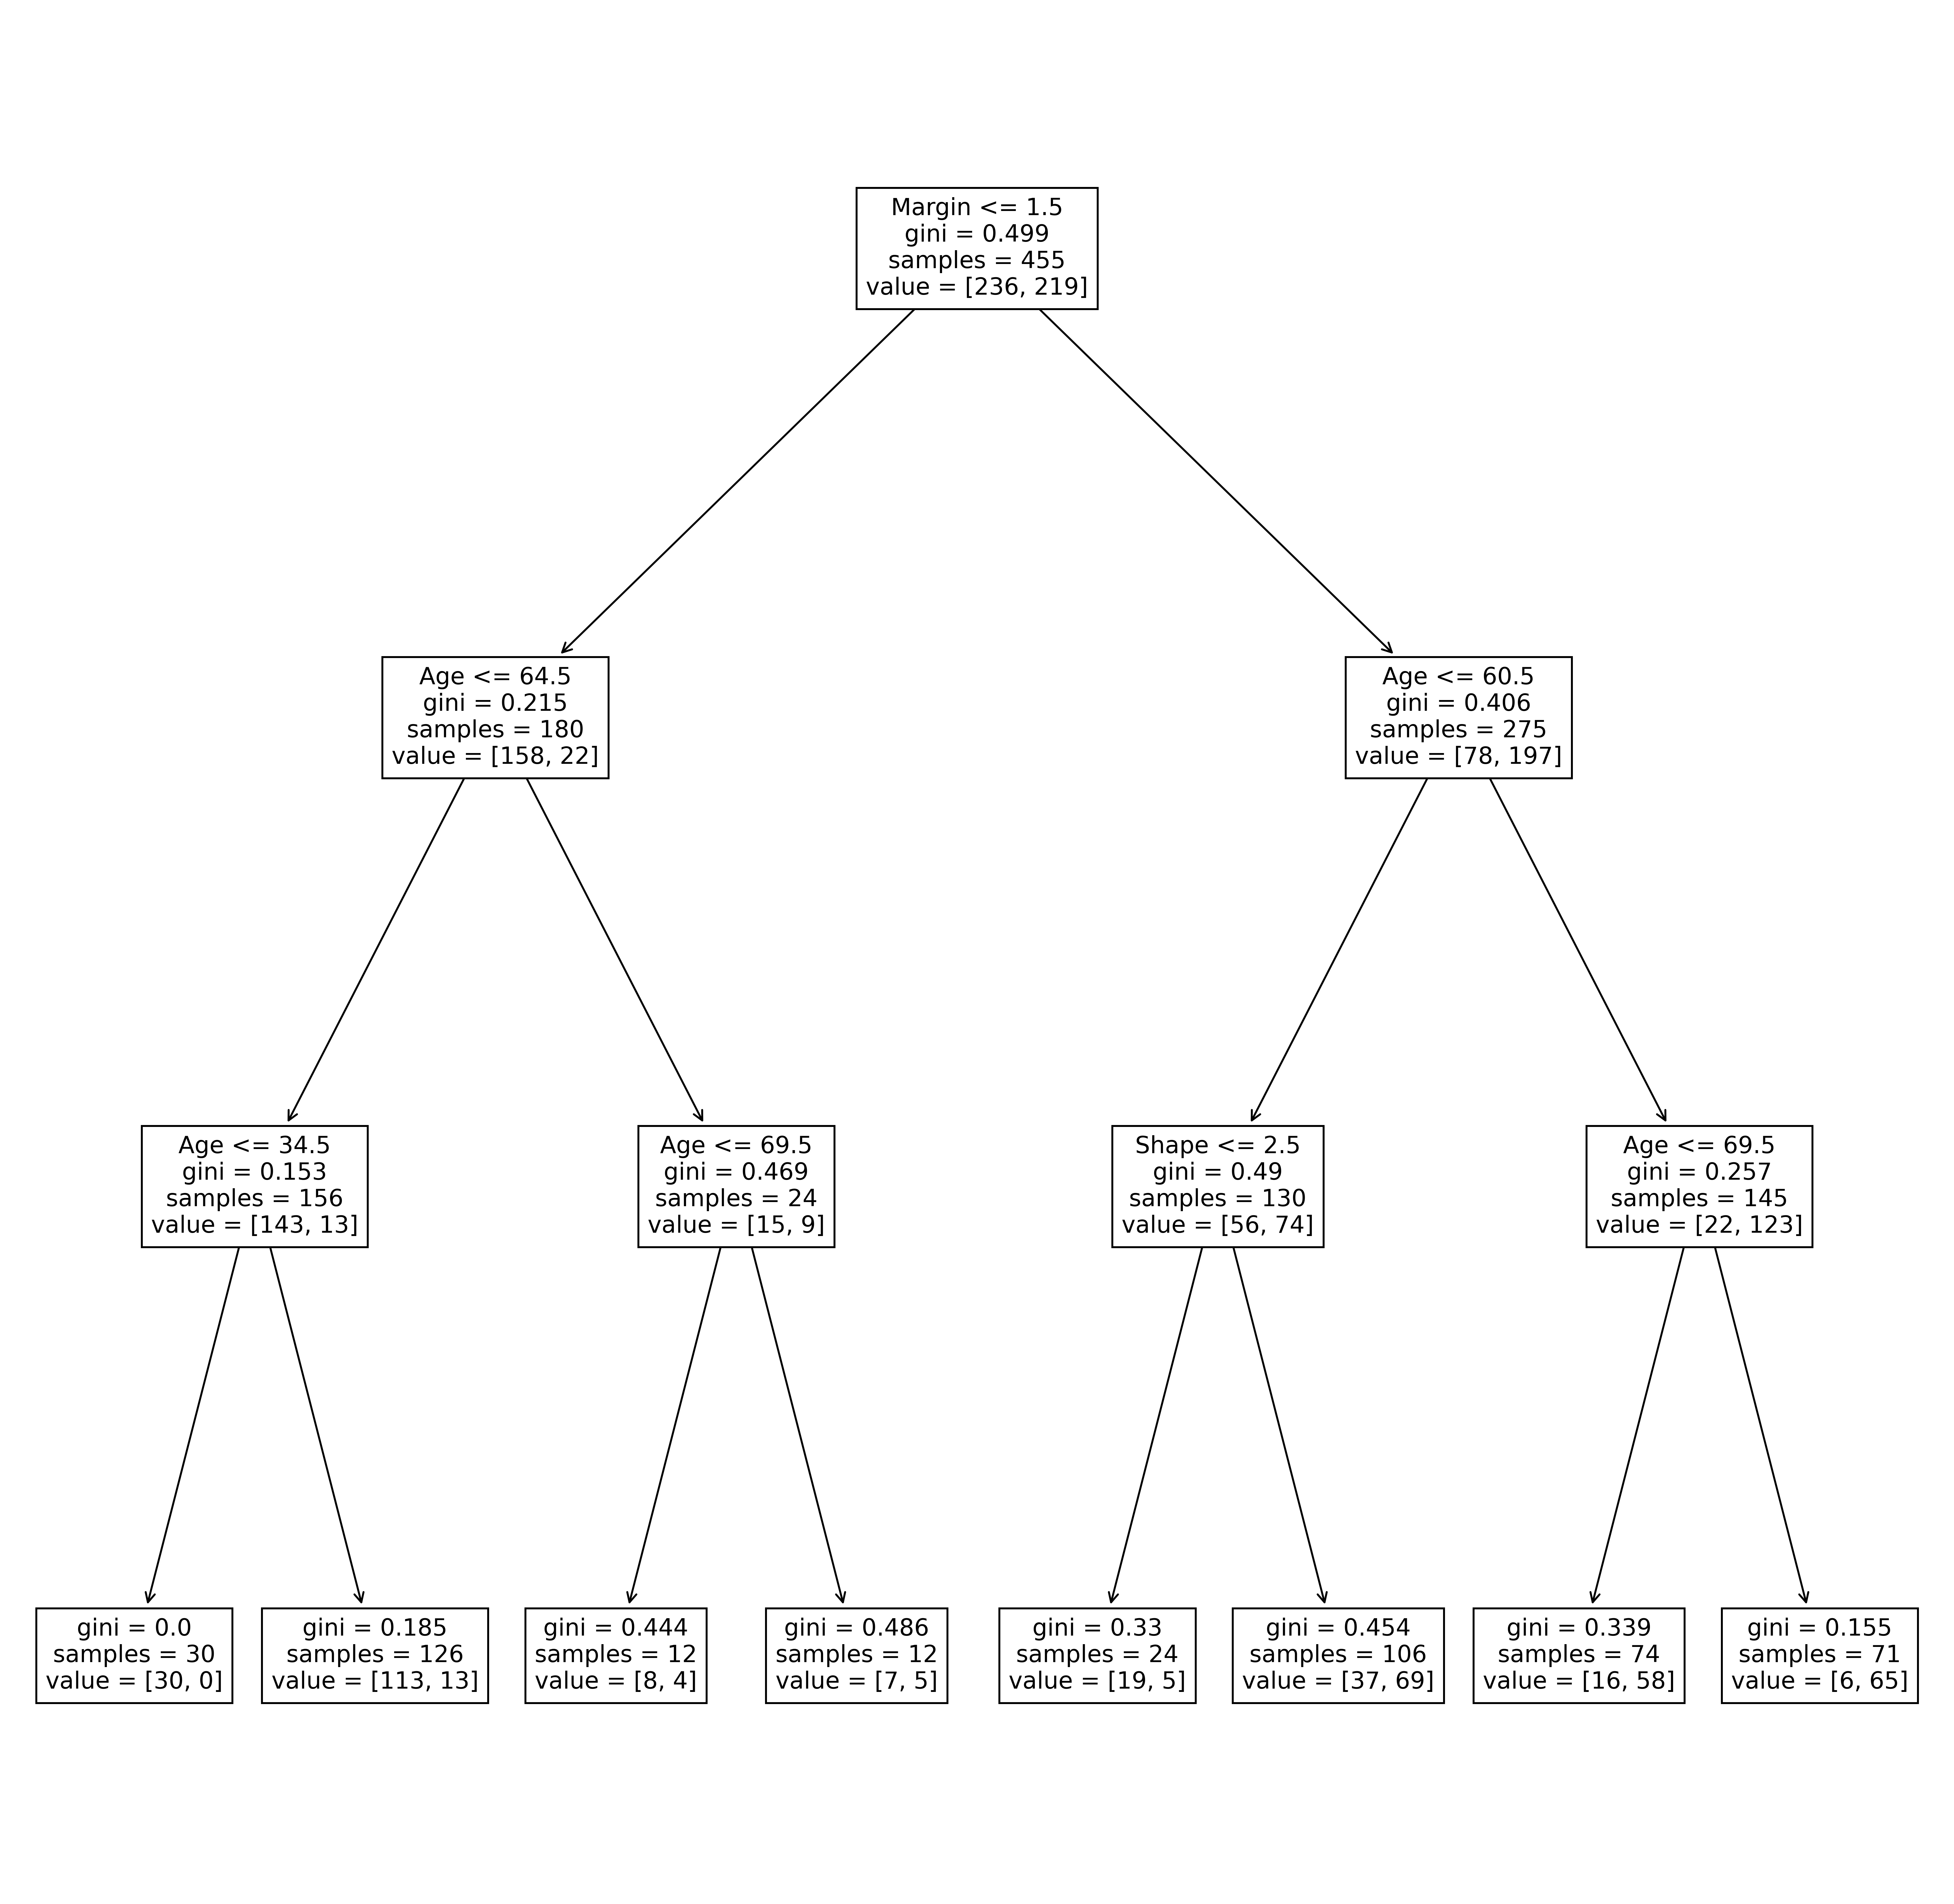

In [178]:
fig,ax = plt.subplots()
tree.plot_tree(clf, feature_names=["Age","Shape","Margin","Density"],ax = ax)
plt.savefig("dtreeGridSearch.png")

In [179]:
print(clf.score(x_train_data,y_train_data))
print(clf.score(x_val_data,y_val_data))
print(clf.score(x_test_data,y_test_data))

0.810989010989011
0.8925619834710744
0.758893280632411


In [5]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train_data, y_train_data)
path = clf.cost_complexity_pruning_path(x_train_data, y_train_data)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [6]:
print(len(ccp_alphas))

63


In [181]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[18,6]    


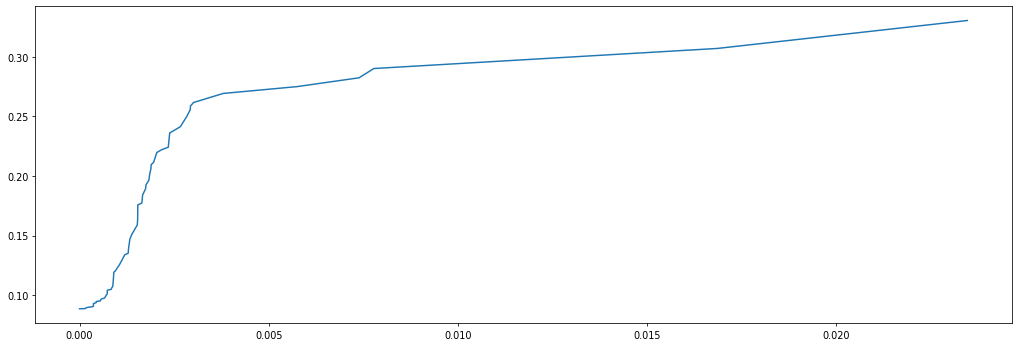

In [182]:
plt.plot(ccp_alphas[:-1],impurities[:-1])

In [183]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(x_train_data,y_train_data)
    clfs.append(clf)

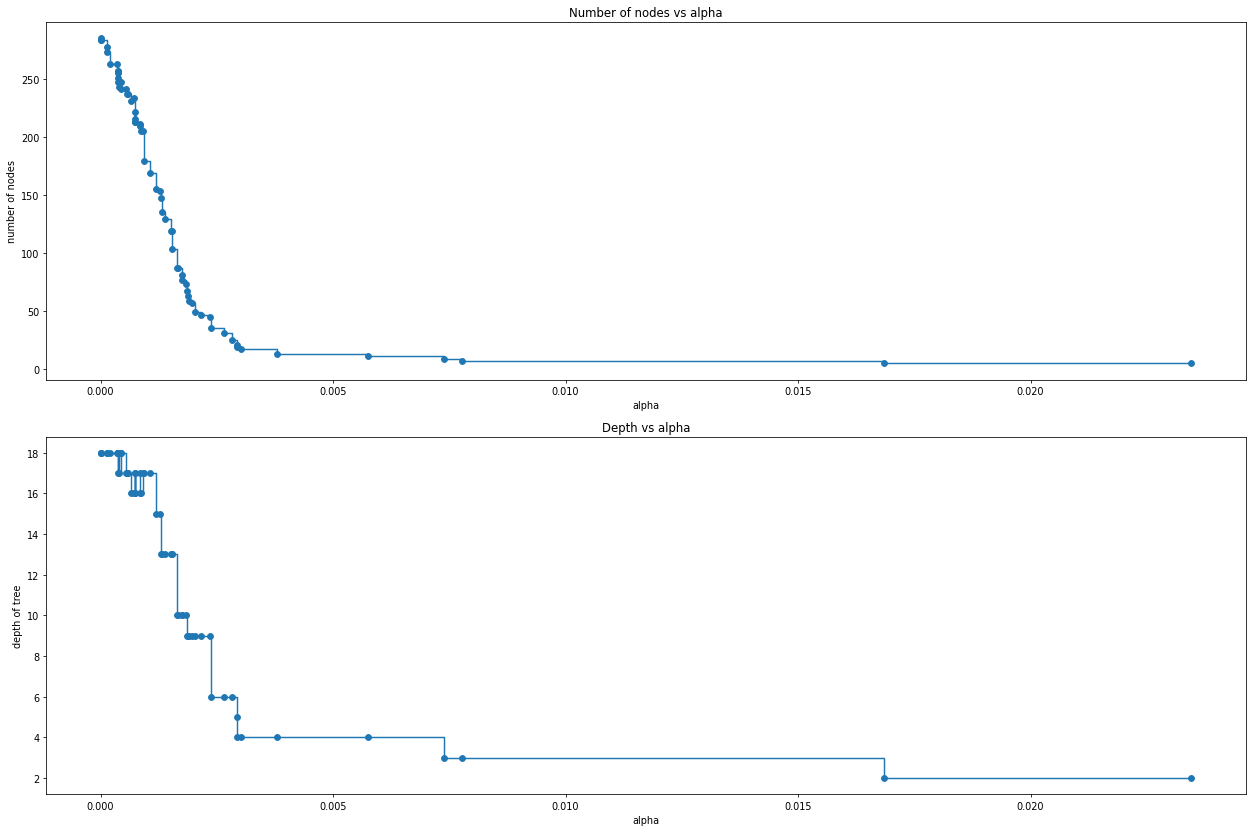

In [184]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[18,12]
# clfs = clfs[:-1]
# ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[:-1], node_counts[:-1], marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[:-1], depth[:-1], marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

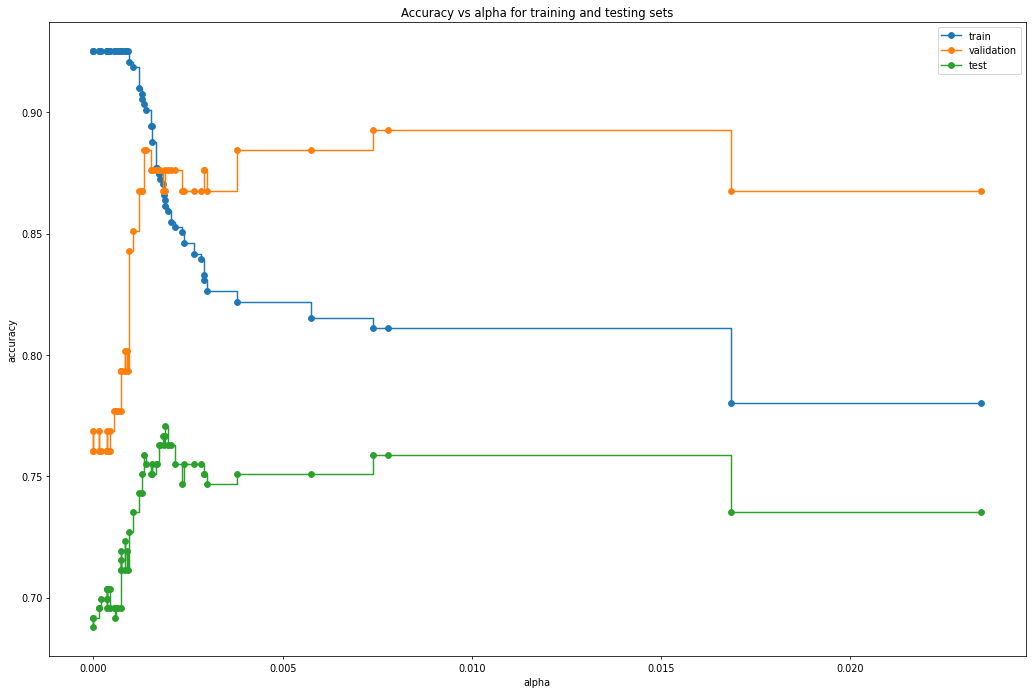

In [185]:
train_scores = [clf.score(x_train_data, y_train_data) for clf in clfs[:-1]]
val_scores = [clf.score(x_val_data, y_val_data) for clf in clfs[:-1]]
test_scores = [clf.score(x_test_data, y_test_data) for clf in clfs[:-1]]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [186]:
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.46520147e-04
 1.46520147e-04 2.01465201e-04 3.49650350e-04 3.66300366e-04
 3.66300366e-04 3.66300366e-04 3.66300366e-04 3.66300366e-04
 4.05748098e-04 4.39560440e-04 4.39560440e-04 5.49450549e-04
 5.63539025e-04 5.86080586e-04 6.59340659e-04 7.15381485e-04
 7.32600733e-04 7.32600733e-04 7.32600733e-04 7.32600733e-04
 8.37257980e-04 8.45308538e-04 8.79120879e-04 9.06845584e-04
 9.41915228e-04 1.05427905e-03 1.19483691e-03 1.28526444e-03
 1.29436864e-03 1.32953466e-03 1.38380138e-03 1.52456576e-03
 1.53497296e-03 1.53935298e-03 1.64653600e-03 1.66646540e-03
 1.74400498e-03 1.75824176e-03 1.83150183e-03 1.85592186e-03
 1.88383046e-03 1.89310689e-03 1.95804196e-03 2.04021331e-03
 2.15538438e-03 2.34432234e-03 2.38219055e-03 2.66400266e-03
 2.83259161e-03 2.92581205e-03 2.93040293e-03 3.01237224e-03
 3.79684418e-03 5.75035882e-03 7.38705739e-03 7.77777778e-03
 1.68513586e-02 2.34609740e-02 1.68807622e-01]


In [187]:
test_scores[np.argsort(val_scores)[-1]]

0.758893280632411

In [188]:
best_clf = (clfs[np.argsort(val_scores)[-1]])

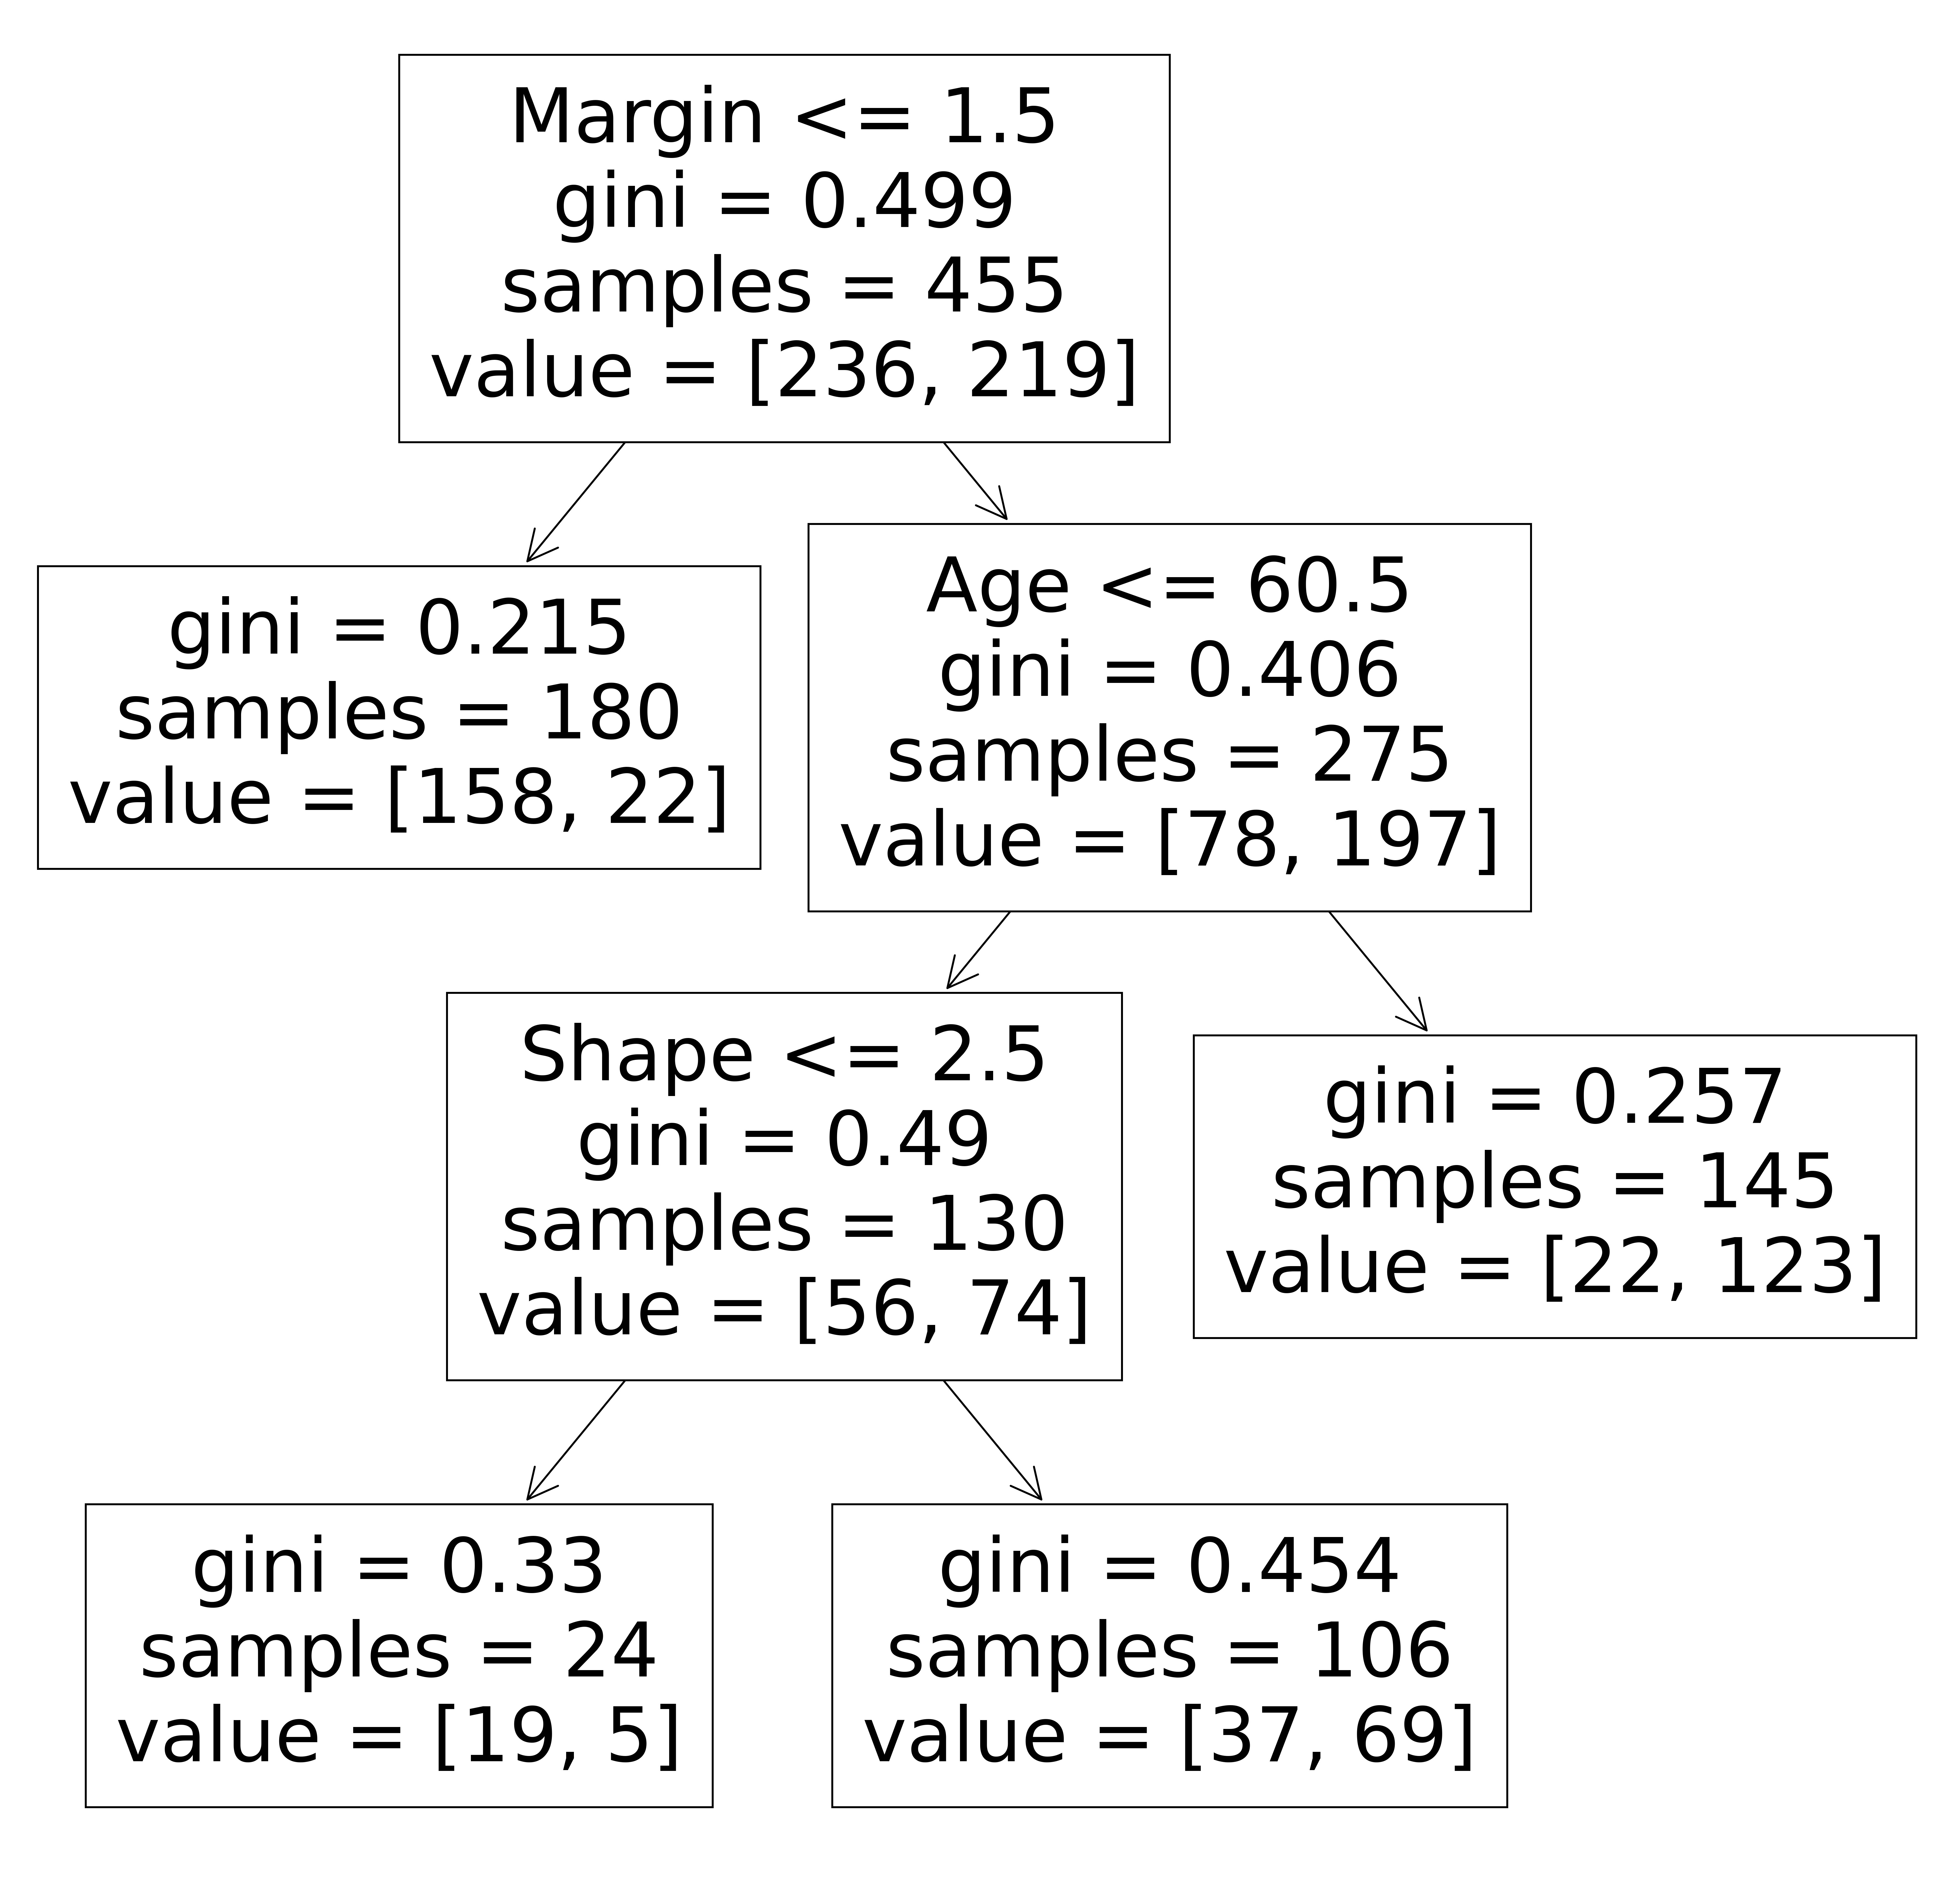

In [189]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize']=[18,18]
fig,ax = plt.subplots()
tree.plot_tree(best_clf, feature_names=["Age","Shape","Margin","Density"],ax = ax)
plt.savefig("dtreePrune.png")

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit,GridSearchCV

x_train_val_data = np.concatenate((x_train_data,x_val_data))
y_train_val_data = np.concatenate((y_train_data,y_val_data))

split_index = [-1 if x < x_train_data.shape[0] else 0 for x in range(x_train_val_data.shape[0])]
# print(x_train_data.shape)

In [191]:
print(x_train_val_data.shape)

(576, 4)


In [192]:
pds = PredefinedSplit(test_fold = split_index)

param_grid = [
  {'n_estimators': [100,500,1000], 'max_features' : [1,1.5,2], 'min_samples_split' : [i for i in range(2,30)], 'oob_score' : [True]}  
 ]

clf = GridSearchCV(estimator = RandomForestClassifier(),cv=pds,param_grid=param_grid)

In [193]:
clf.fit(x_train_val_data, y_train_val_data.reshape((-1,)))

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atifa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\atifa\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\atifa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81818182 0.80165289 0.82644628 0.81818182 0.78512397 0.81818182
 0.82644628 0.81818182 0.81818182 0.80165289 0.82644628 0.81818182
 0.84297521 0.82644628 0.82644628 0.84297521 0.84297521 0.87603306
 0.85123967 0.85950413 0.8677686  0.8677686  0.87603306 0.8677686
 0.8677686  0.8677686  0.8677686  0.8677686  0.8677686  0.8677686
 0.85950413 0.8677686  0.8677686  0.8677686  0.85950413 0.87603306
 0.85950413 0.8677686  0.85950413 0.8677686  0.8677686  0.8677686
 0.85950413 0.87603306 0.85950413 0.8677686  0.8677686  0.87603306
 0.87603306 0.8677686  0.87603306 0.8677686  0.8677686  0.87603306
 0.87603306 0.87603306 0.87603306 0.87603306 0.8677686  0.87603306
 0.87603306 0.8677686  0.87603306 0.8677686  0.87603306 0.87603306
 0.87603306 0.87603306 0.87603306 0.87603306 0.87603306 0.87603306
 0.8677686  0.87603306 0.87603306 0.87603306 0.87603306 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [1, 1.5, 2],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18, 19,
                                                20, 21, 22, 23, 24, 25, 26, 27,
                                                28, 29],
                          'n_estimators': [100, 500, 1000],
                          'oob_score': [True]}])

In [195]:
print(clf.cv_results_)

{'mean_fit_time': array([0.14182091, 0.67750096, 1.42599893, 0.13449836, 0.73150039,
       1.39450169, 0.1379981 , 0.68599987, 1.41800094, 0.12999988,
       0.67003345, 1.37797236, 0.1309998 , 0.67149949, 1.36599851,
       0.13249993, 0.71250176, 1.32849979, 0.12899733, 0.65000033,
       1.37550116, 0.1314981 , 0.66500068, 1.34800601, 0.13049102,
       0.7160008 , 1.3410008 , 0.14145923, 0.64249969, 1.37250018,
       0.12850022, 0.64449787, 1.40999985, 0.1370008 , 0.70849967,
       1.34250045, 0.13200021, 0.65499926, 1.34750104, 0.19300103,
       0.63800073, 1.31800127, 0.12800097, 0.69599915, 1.34499955,
       0.13050127, 0.65849829, 1.33700109, 0.13250113, 0.65599895,
       1.29750037, 0.1569984 , 0.62999845, 1.3684988 , 0.12550163,
       0.6394999 , 1.29847598, 0.12549949, 0.68550062, 1.29799819,
       0.12899995, 0.65750051, 1.30999994, 0.19150352, 0.63199759,
       1.34100008, 0.12599993, 0.63200259, 1.37447286, 0.12518692,
       0.69650459, 1.3129971 , 0.12600017, 0

In [196]:
print(clf.best_estimator_.score(x_train_data,y_train_data))
print(clf.best_estimator_.oob_score_)
print(clf.best_estimator_.score(x_val_data,y_val_data))
print(clf.best_estimator_.score(x_test_data,y_test_data))

0.8395604395604396
0.8072916666666666
0.9173553719008265
0.766798418972332


In [197]:
clf.best_estimator_.n_estimators

100

In [204]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [205]:
full_train_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/train.csv",na_values = '?',dtype=float)
full_train_data = imp_median.fit_transform(full_train_data)

In [206]:
# full_train_data.columns = ["BI-RADS assessment","Age","Shape","Margin","Density","Severity"]
print(full_train_data)
x_train_data = full_train_data[:,1:5]
y_train_data = full_train_data[:,5]

[[ 4. 46.  4.  3.  3.  0.]
 [ 5. 64.  3.  3.  3.  1.]
 [ 4. 71.  4.  5.  3.  1.]
 ...
 [ 4. 56.  4.  4.  3.  0.]
 [ 4. 40.  1.  1.  3.  0.]
 [ 3. 43.  1.  3.  3.  0.]]


In [160]:
print(y_val_data.shape)

(121,)


In [220]:
import xgboost as xgb
full_train_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/train.csv",na_values='?',dtype=float)
full_val_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/val.csv",na_values='?',dtype=float)
full_test_data = pd.read_csv("D:/GitHub/COL774/Assignment 3/data/col774_mammography/test.csv",na_values='?',dtype=float)
x_train_data = full_train_data[["Age","Shape","Margin","Density"]].copy().to_numpy()
y_train_data = full_train_data[["Severity"]].copy().to_numpy().reshape((-1,))
x_val_data = full_val_data[["Age","Shape","Margin","Density"]].copy().to_numpy()
y_val_data = full_val_data[["Severity"]].copy().to_numpy().reshape((-1,))
x_test_data = full_test_data[["Age","Shape","Margin","Density"]].copy().to_numpy()
y_test_data = full_test_data[["Severity"]].copy().to_numpy().reshape((-1,))

x_train_val_data = np.concatenate((x_train_data,x_val_data))
y_train_val_data = np.concatenate((y_train_data,y_val_data))

split_index = [-1 if x < x_train_data.shape[0] else 0 for x in range(x_train_val_data.shape[0])]


In [221]:
pds = PredefinedSplit(test_fold = split_index)

param_grid = [
  {'n_estimators': [10,20,30,40,50], 'max_depth' : [4,5,6,7,8,9,10], 'subsample' : [0.1,0.2,0.3,0.4,0.5,0.6]}  
 ]

clf = GridSearchCV(estimator = xgb.XGBClassifier(),cv=pds,param_grid=param_grid)

In [222]:
clf.fit(x_train_val_data, y_train_val_data.reshape((-1,)))

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constra...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                            

In [226]:
print(clf.best_estimator_.score(x_train_data,y_train_data))
# print(clf.best_estimator_.oob_score_)
print(clf.best_estimator_.score(x_val_data,y_val_data))
print(clf.best_estimator_.score(x_test_data,y_test_data))

0.8081936685288641
0.9037037037037037
0.7777777777777778
